In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [3]:
import kagglehub

path = kagglehub.dataset_download("ahmedhamada0/brain-tumor-detection")

print("Path to dataset files:", path)


Path to dataset files: /root/.cache/kagglehub/datasets/ahmedhamada0/brain-tumor-detection/versions/12


In [4]:
mv /root/.cache/kagglehub/datasets/ahmedhamada0/brain-tumor-detection/versions/12 ./

In [3]:
import cv2
import glob
import skimage.transform as trans
import numpy as np
import sys
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


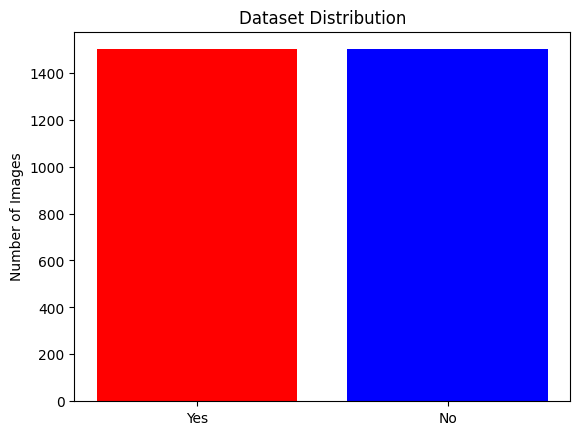

In [5]:

import os

yes_path = './data/yes/'
no_path = './data/no/'

yes_count = len(os.listdir(yes_path))
no_count = len(os.listdir(no_path))


categories = ['Yes', 'No']
counts = [yes_count, no_count]

plt.bar(categories, counts, color=['red', 'blue'])
plt.title('Dataset Distribution')
plt.ylabel('Number of Images')
plt.show()

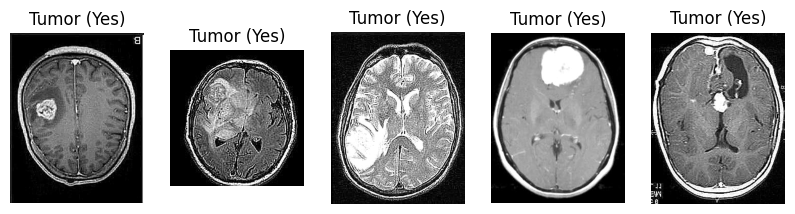

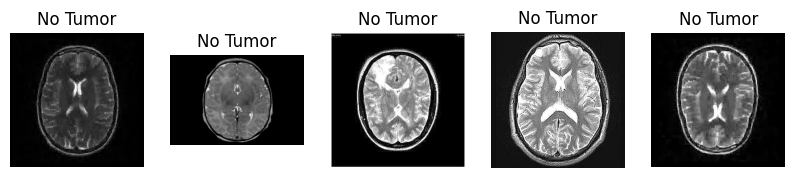

In [6]:

def display_samples(category_path, category_name, num_samples=5):
    images = os.listdir(category_path)[:num_samples]
    plt.figure(figsize=(10, 5))
    for i, img_name in enumerate(images):
        img_path = os.path.join(category_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(category_name)
        plt.axis('off')
    plt.show()

display_samples('./data/yes/', 'Tumor (Yes)')
display_samples('./data/no/', 'No Tumor')


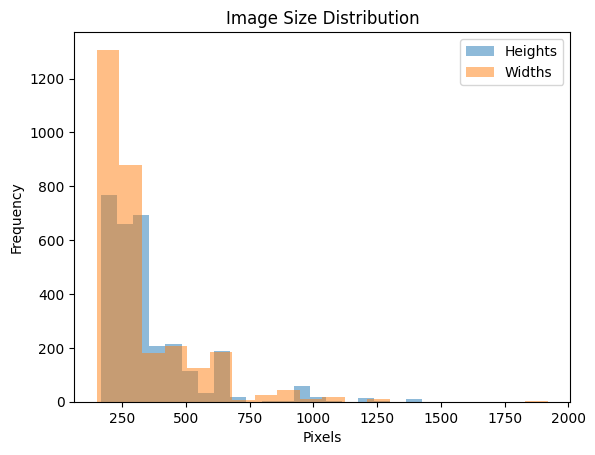

In [7]:
# @title Default title text
def check_image_sizes(folder_path):
    sizes = []
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)
        sizes.append(img.shape[:2])  # Height, Width
    return sizes

yes_sizes = check_image_sizes('./data/yes/')
no_sizes = check_image_sizes('./data/no/')

# Flatten and visualize
all_sizes = yes_sizes + no_sizes
heights, widths = zip(*all_sizes)

plt.hist(heights, bins=20, alpha=0.5, label='Heights')
plt.hist(widths, bins=20, alpha=0.5, label='Widths')
plt.title('Image Size Distribution')
plt.xlabel('Pixels')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [33]:
from tensorflow.keras.models import save_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [48]:
def cnn(pretrained_weights=None, input_shape=(256,256,1)):
    model = Sequential()
    model.add(Conv2D(32, 4, activation = 'relu', padding = 'same', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))
    model.add(Conv2D(32, 4, activation = 'relu', padding = 'same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))
    model.add(Conv2D(64, 4, activation = 'relu', padding = 'same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.15))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(),loss='binary_crossentropy',metrics=['acc'])
    if(pretrained_weights):
        model.load_weights(pretrained_weights)
    return model

In [8]:
def preprocess_image(image_path, target_size=(256, 256)):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = img / 255.0
    img = trans.resize(img, target_size)
    return img

In [11]:
x = []
y = []

path = "./data/no/"
images = glob.glob(path + "*.jpg")
images.sort()
for image in images:
   image = preprocess_image(image, target_size=(256, 256))
   y.append(0)
   x.append(image)

path = "./data/yes/"
images = glob.glob(path + "*.jpg")
images.sort()
for image in images:
   image = preprocess_image(image, target_size=(256, 256))
   y.append(1)
   x.append(image)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

x_train = np.reshape(X_train, (len(X_train), 256, 256, 1))
x_test = np.reshape(X_test, (len(X_test), 256, 256, 1))


In [12]:
model = cnn()
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 32)        │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 32)        │          16,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 64)          │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       8,388,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,438,657 (32.19 MB)

 Trainable params: 8,438,657 (32.19 MB)

 Non-trainable params: 0 (0.00 B)

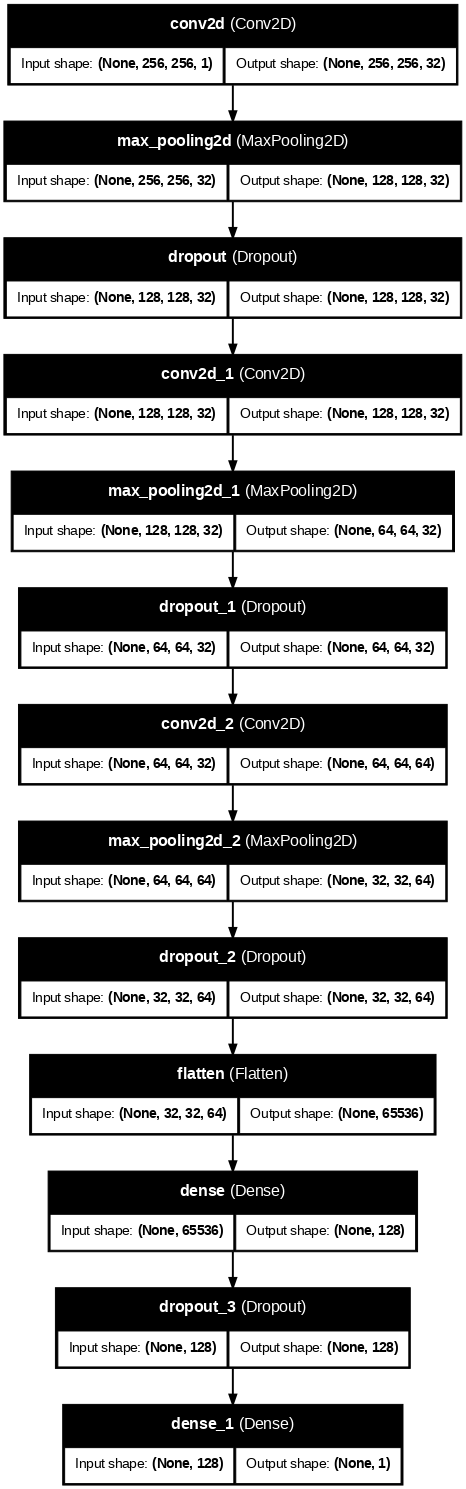

In [85]:
from tensorflow.keras.utils import plot_model
plot_model(model,
           show_shapes = True,
           show_dtype=False,
           show_layer_names = True,
           rankdir = 'TB',
           expand_nested = False,
           dpi = 70)

In [14]:
from tensorflow.keras.callbacks import EarlyStopping

In [14]:
early_stopping = EarlyStopping( monitor='val_loss',  patience=3, restore_best_weights=True)
x_val, x_test, y_val,y_test = train_test_split(x_test, y_test, test_size=0.2, random_state=42)

In [15]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_val = np.array(x_val)
y_val = np.array(y_val)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [16]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=15, batch_size=4, verbose=1, callbacks=[early_stopping])

Epoch 1/15
525/525 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - acc: 0.6916 - loss: 0.7370 - val_acc: 0.8764 - val_loss: 0.3277
Epoch 2/15
525/525 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - acc: 0.8833 - loss: 0.2877 - val_acc: 0.9083 - val_loss: 0.2436
Epoch 3/15
525/525 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - acc: 0.9445 - loss: 0.1566 - val_acc: 0.9375 - val_loss: 0.1569
Epoch 4/15
525/525 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - acc: 0.9639 - loss: 0.0938 - val_acc: 0.9500 - val_loss: 0.1419
Epoch 5/15
525/525 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - acc: 0.9763 - loss: 0.0563 - val_acc: 0.9500 - val_loss: 0.1271
Epoch 6/15
525/525 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - acc: 0.9734 - loss: 0.0707 - val_acc: 0.9431 - val_loss: 0.1866
Epoch 7/15
525/525 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - acc: 0.9873 - loss: 0.0401 - val_acc: 0.9667 - val_loss: 0.0903
Epoch 8/15
525/525 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - acc: 0.9851 - loss: 0.0417 - val_acc: 0.9653 - val_loss: 0.1109
Epoch 9/15
525/525 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms

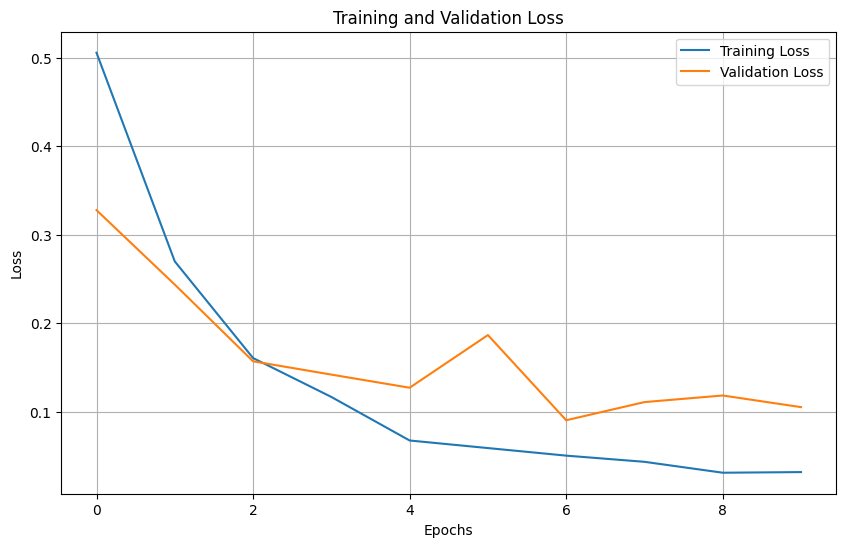

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid()
plt.show()

In [18]:
save_model(model, '/content/drive/MyDrive/data/models/cnn_model.h5')

In [19]:
model.save_weights('/content/drive/MyDrive/data/models/cnn_model.weights.h5')

In [20]:
score = model.evaluate(x_test,y_test,verbose=0)
print('Test accuracy: {:.2f}'.format(score[1]))

Test accuracy: 0.98


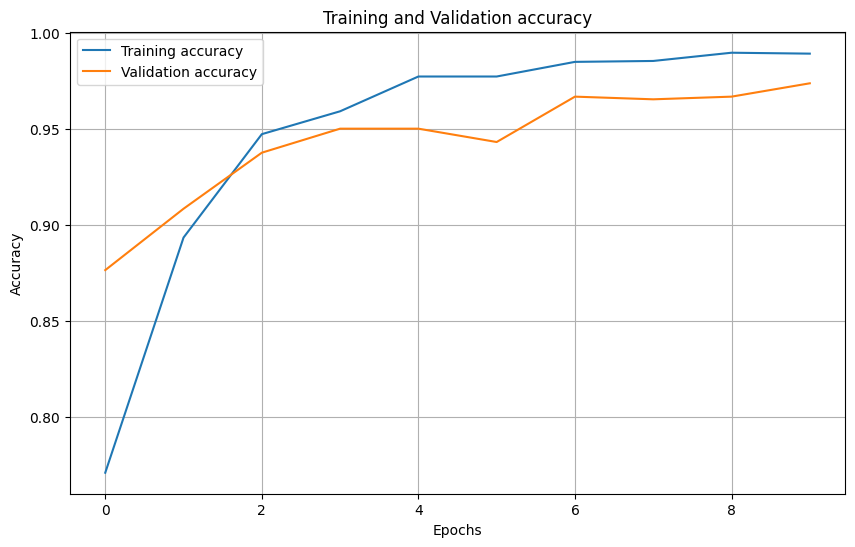

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['acc'], label='Training accuracy')
plt.plot(history.history['val_acc'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.grid()
plt.show()

In [22]:
def classify_and_plot(model, image_path, class_names=('No', 'Yes')):
    img = preprocess_image(image_path,target_size=(256, 256))
    img = np.reshape(img, (1, 256, 256, 1))
    prediction = model.predict(img)
    predicted_class = class_names[int(prediction[0] > 0.5)]  # 0 or 1 based on threshold
    print(f'Prediction: {predicted_class}')

    original_img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    plt.imshow(original_img, cmap='gray')
    plt.title(f'Prediction: {predicted_class}')
    plt.axis('off')
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


<ipython-input-23-d6b403efe37c>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class = class_names[int(prediction[0] > 0.5)]


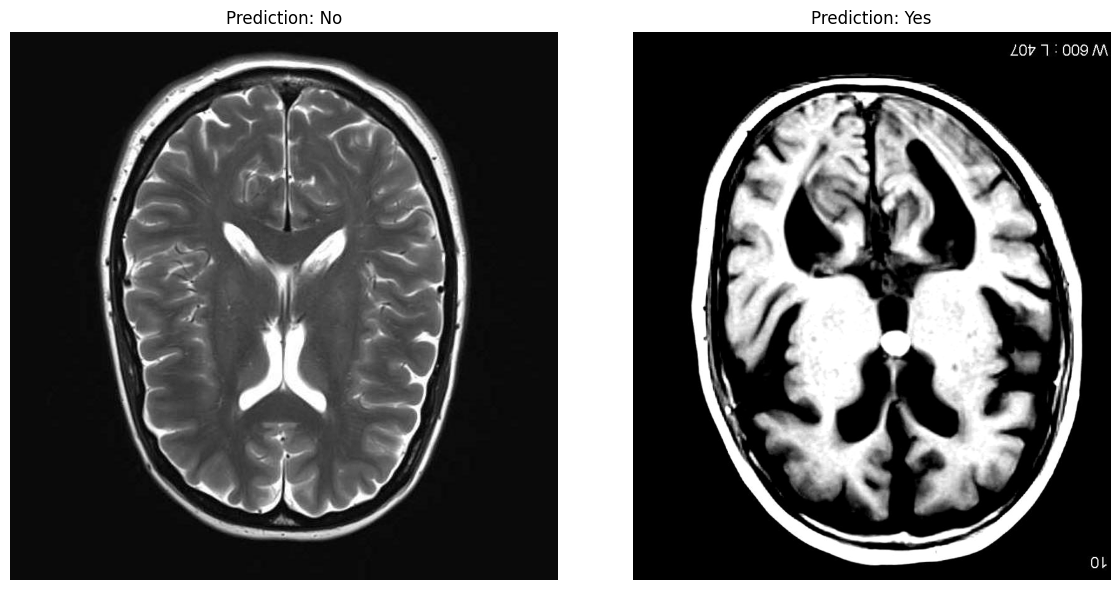

In [23]:
def classify_and_plot_two(model, image_paths, class_names=('No', 'Yes')):
    plt.figure(figsize=(12, 6))
    for i, image_path in enumerate(image_paths):
        img = preprocess_image(image_path,target_size=(256, 256))
        img = np.reshape(img, (1, 256, 256, 1))
        prediction = model.predict(img)
        predicted_class = class_names[int(prediction[0] > 0.5)]
        original_img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        plt.subplot(1, 2, i + 1)
        plt.imshow(original_img, cmap='gray')
        plt.title(f'Prediction: {predicted_class}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()


image_paths = [
    '/content/drive/MyDrive/data/no/No12.jpg',
    '/content/drive/MyDrive/data/yes/y10.jpg'
]
classify_and_plot_two(model, image_paths)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Prediction: No


<ipython-input-22-f5adb1ab44a6>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class = class_names[int(prediction[0] > 0.5)]  # 0 or 1 based on threshold


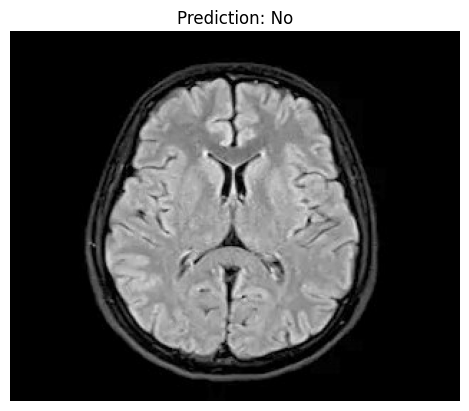

In [24]:
image_path = '/content/drive/MyDrive/data/pred/pred0.jpg'
classify_and_plot(model, image_path)

In [4]:
cd '/content/drive/MyDrive/'

/content/drive/MyDrive


In [28]:

import json


directory = r'./data/Br35H-Mask-RCNN/Annotation_Test/Train_data'

if not os.path.exists(directory):
    os.makedirs(directory)

with open('./data/Br35H-Mask-RCNN/TRAIN/annotations_train.json') as json_file:
    data = json.load(json_file)


# loading images
images_path = "./data/Br35H-Mask-RCNN/TRAIN/"
train_images = glob.glob(images_path + "*.jpg")


for img in train_images:
   image = cv2.imread(img)
   dimensions = image.shape
   file_name = os.path.basename(img)
   file_name = file_name.replace(".jpg", "")
   os.chdir(directory)
   tmp = np.zeros(dimensions).astype('uint8')
   for d in data:
       if file_name == data[d]['filename'].replace(".jpg",""):
           if len(data[d]['regions'][0]['shape_attributes']) == 3:
               x_pixels = data[d]['regions'][0]['shape_attributes']['all_points_x']
               y_pixels = data[d]['regions'][0]['shape_attributes']['all_points_y']
               pts = []
               for i in range(len(x_pixels)):
                   pts.append([x_pixels[i], y_pixels[i]])
               ptss = np.array(pts)
               ptss = ptss.reshape((-1, 1, 2))
               isClosed = True
               tmp = cv2.fillPoly(tmp, [ptss], (255,255,255))
           elif len(data[d]['regions'][0]['shape_attributes']) == 6:
               center_coordinates = (data[d]['regions'][0]['shape_attributes']['cx'],
                                     data[d]['regions'][0]['shape_attributes']['cy'])
               axesLength = (int(data[d]['regions'][0]['shape_attributes']['rx']),
                             int(data[d]['regions'][0]['shape_attributes']['ry']))
               angle = data[d]['regions'][0]['shape_attributes']['theta']
               startAngle = 0
               endAngle = 360
               tmp = cv2.ellipse(tmp,center_coordinates,axesLength,angle,startAngle,endAngle,(255,255,255),thickness=-1)

   cv2.imwrite("{}.png".format(file_name), tmp.astype('uint8'))
   os.chdir('/content/drive/MyDrive/')


In [29]:
print('The length of the Train data: ',len(os.listdir('/content/drive/MyDrive/data/Br35H-Mask-RCNN/Annotation_Test/Train_data')))

The length of the Train data:  500


In [37]:
import albumentations as A

In [51]:
def horizontal_flip(image, mask):
    flipped_image = cv2.flip(image, 1)
    flipped_mask = cv2.flip(mask, 1)
    return flipped_image, flipped_mask

def vertical_flip(image, mask):
    flipped_image = cv2.flip(image, 0)
    flipped_mask = cv2.flip(mask, 0)
    return flipped_image, flipped_mask

def rotate_image(image, mask, angle=30):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (w, h), flags=cv2.INTER_LINEAR)
    rotated_mask = cv2.warpAffine(mask, rotation_matrix, (w, h), flags=cv2.INTER_NEAREST)
    return rotated_image, rotated_mask

In [52]:
augs = [horizontal_flip, vertical_flip, rotate_image]

In [6]:
def preprocess_image_and_mask(image_path, mask_path, target_size=(256, 256)):
    image = cv2.imread(image_path)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    return image, mask

In [57]:
image_path = "/content/drive/MyDrive/data/Br35H-Mask-RCNN/TRAIN/"
mask_path = "/content/drive/MyDrive/data/Br35H-Mask-RCNN/Annotation_Test/Train_data/"


save_image_dir = "/content/drive/MyDrive/data/Br35H-Mask-RCNN/aug_images/"
save_mask_dir = "/content/drive/MyDrive/data/Br35H-Mask-RCNN/Annotation_Test/aug_masks/"
os.makedirs(save_image_dir, exist_ok=True)
os.makedirs(save_mask_dir, exist_ok=True)


image_files = glob.glob(image_path + "*.jpg")
image_files.sort()
mask_files = glob.glob(mask_path + "*.png")
mask_files.sort()



for img_file, mask_file in zip(image_files, mask_files):

    image, mask = preprocess_image_and_mask(img_file, mask_file)


    base_name = os.path.splitext(os.path.basename(img_file))[0]
    cv2.imwrite(os.path.join(save_image_dir, f"{base_name}_orig.jpg"), image)
    cv2.imwrite(os.path.join(save_mask_dir, f"{base_name}_orig.jpg"), mask)

    for i in range(3):
        augmented = augs[i](image=image, mask=mask)
        aug_image = augmented[0]
        aug_mask = augmented[1]


        aug_image_filename = f"{base_name}_aug_{i}.jpg"
        aug_mask_filename = f"{base_name}_aug_{i}.jpg"
        cv2.imwrite(os.path.join(save_image_dir, aug_image_filename), aug_image)
        cv2.imwrite(os.path.join(save_mask_dir, aug_mask_filename), aug_mask)


print(f"Augmented images saved to: {save_image_dir} ,{len(os.listdir(save_image_dir))}")
print(f"Augmented masks saved to: {save_mask_dir},{len(os.listdir(save_mask_dir))}")




Augmented images saved to: /content/drive/MyDrive/data/Br35H-Mask-RCNN/aug_images/ ,2000
Augmented masks saved to: /content/drive/MyDrive/data/Br35H-Mask-RCNN/Annotation_Test/aug_masks/,2000


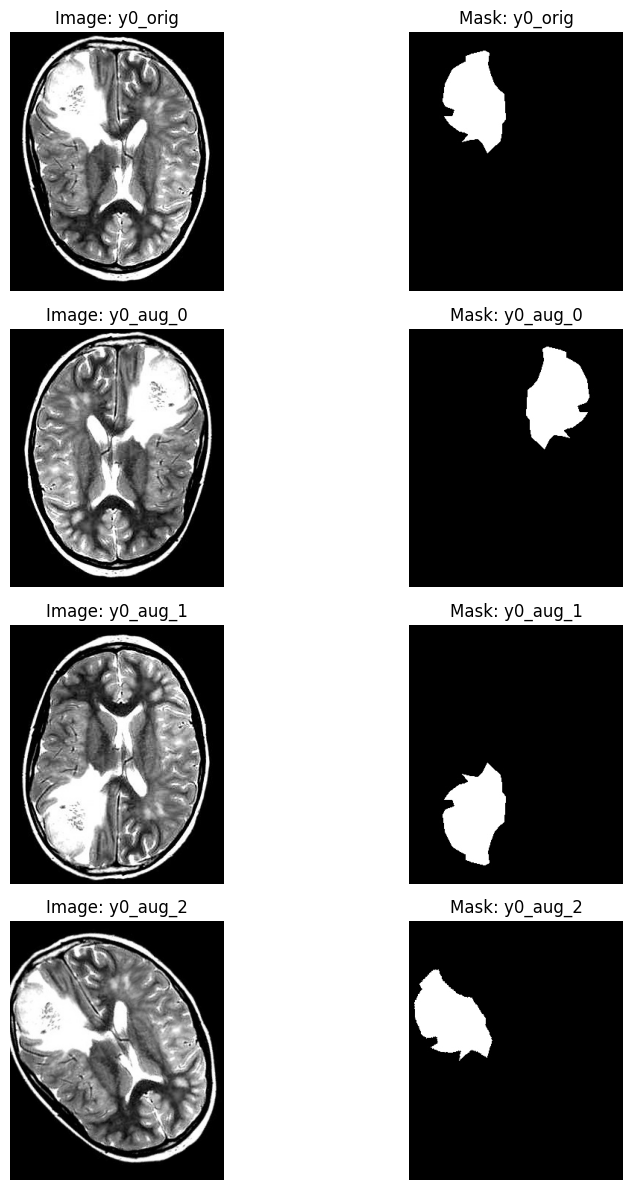

In [61]:

filenames = ["y0_orig.jpg", "y0_aug_0.jpg", "y0_aug_1.jpg", "y0_aug_2.jpg"]

plt.figure(figsize=(10, 12))
for i, filename in enumerate(filenames):
    img_path = os.path.join(save_image_dir, filename)
    image = cv2.imread(img_path)
    if image is not None:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    mask_path = os.path.join(save_mask_dir, filename)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    plt.subplot(4, 2, 2 * i + 1)
    plt.imshow(image)
    title = filename.replace(".jpg", "")
    plt.title(f"Image: {title}")
    plt.axis("off")


    plt.subplot(4, 2, 2 * i + 2)
    plt.imshow(mask, cmap="gray")
    title = filename.replace(".jpg", "")
    plt.title(f"Mask: {title}")
    plt.axis("off")

plt.tight_layout()
plt.show()


In [9]:
x_o = []
x_m = []


image_dir = "/content/drive/MyDrive/data/Br35H-Mask-RCNN/aug_images/"
mask_dir = "/content/drive/MyDrive/data/Br35H-Mask-RCNN/Annotation_Test/aug_masks/"


image_files = glob.glob(image_dir + "*.jpg")
image_files.sort()
mask_files = glob.glob(mask_dir + "*.jpg")
mask_files.sort()


for img_file, mask_file in zip(image_files, mask_files):
  images = preprocess_image(img_file, target_size=(256, 256))
  mask = preprocess_image(mask_file, target_size=(256, 256))

  x_o.append(images)
  x_m.append(mask)

x_o = np.reshape(x_o, (len(x_o), 256, 256, 1))
x_m = np.reshape(x_m, (len(x_m), 256, 256, 1))


In [68]:

import json


directory = r'/content/drive/MyDrive/data/Br35H-Mask-RCNN/Annotation_Test/val_data'

if not os.path.exists(directory):
    os.makedirs(directory)

with open('/content/drive/MyDrive/data/Br35H-Mask-RCNN/VAL/annotations_val.json') as json_file:
    data = json.load(json_file)


# loading images
images_path = "/content/drive/MyDrive/data/Br35H-Mask-RCNN/VAL/"
val_images = glob.glob(images_path + "*.jpg")


for img in val_images:
   image = cv2.imread(img)
   dimensions = image.shape
   file_name = os.path.basename(img)
   file_name = file_name.replace(".jpg", "")
   os.chdir(directory)
   tmp = np.zeros(dimensions).astype('uint8')
   for d in data:
       if file_name == data[d]['filename'].replace(".jpg",""):
           if len(data[d]['regions'][0]['shape_attributes']) == 3:
               x_pixels = data[d]['regions'][0]['shape_attributes']['all_points_x']
               y_pixels = data[d]['regions'][0]['shape_attributes']['all_points_y']
               pts = []
               for i in range(len(x_pixels)):
                   pts.append([x_pixels[i], y_pixels[i]])
               ptss = np.array(pts)
               ptss = ptss.reshape((-1, 1, 2))
               isClosed = True
               tmp = cv2.fillPoly(tmp, [ptss], (255,255,255))
           elif len(data[d]['regions'][0]['shape_attributes']) == 6:
               center_coordinates = (data[d]['regions'][0]['shape_attributes']['cx'],
                                     data[d]['regions'][0]['shape_attributes']['cy'])
               axesLength = (int(data[d]['regions'][0]['shape_attributes']['rx']),
                             int(data[d]['regions'][0]['shape_attributes']['ry']))
               angle = data[d]['regions'][0]['shape_attributes']['theta']
               startAngle = 0
               endAngle = 360
               tmp = cv2.ellipse(tmp,center_coordinates,axesLength,angle,startAngle,endAngle,(255,255,255),thickness=-1)

   cv2.imwrite("{}.jpg".format(file_name), tmp.astype('uint8'))
   os.chdir('/content/drive/MyDrive/')


In [10]:
x_o_val = []
x_m_val = []


image_dir = "/content/drive/MyDrive/data/Br35H-Mask-RCNN/VAL/"
mask_dir = "/content/drive/MyDrive/data/Br35H-Mask-RCNN/Annotation_Test/val_data/"


image_files = glob.glob(image_dir + "*.jpg")
image_files.sort()
mask_files = glob.glob(mask_dir + "*.jpg")
mask_files.sort()


for img_file, mask_file in zip(image_files, mask_files):
  images = preprocess_image(img_file, target_size=(256, 256))
  mask = preprocess_image(mask_file, target_size=(256, 256))

  x_o_val.append(images)
  x_m_val.append(mask)

In [11]:

x_o_val = np.reshape(x_o_val, (len(x_o_val), 256, 256, 1))
x_m_val = np.reshape(x_m_val, (len(x_m_val), 256, 256, 1))


In [12]:
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Dropout, concatenate

def unet(pretrained_weights=None, input_size=(256,256,1)):
    inputs = Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2), strides = 2)(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2), strides = 2)(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2), strides = 2)(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2), strides = 2)(drop4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)
    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)
    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)
    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)
    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = Model(inputs, conv10)
    model.compile(optimizer =Adam(learning_rate=1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])
    if(pretrained_weights):
    	model.load_weights(pretrained_weights)

    return model

In [13]:
model_u = unet(pretrained_weights=None, input_size=(256,256,1))
model_u.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 1)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 256, 256, 64)   │            640 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 256, 256, 64)   │         36,928 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 128, 128, 64)   │              0 │ conv2d_1[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 128, 128, 128)  │         73,856 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 128, 128, 128)  │        147,584 │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 64, 64, 128)    │              0 │ conv2d_3[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 64, 64, 256)    │        295,168 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 64, 64, 256)    │        590,080 │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 32, 32, 256)    │              0 │ conv2d_5[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 32, 32, 512)    │      1,180,160 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 32, 32, 512)    │      2,359,808 │ conv2d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 32, 32, 512)    │              0 │ conv2d_7[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_3           │ (None, 16, 16, 512)    │              0 │ dropout[0][0]          │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 16, 16, 1024)   │      4,719,616 │ max_pooling2d_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)         │ (None, 16, 16, 1024)   │      9,438,208 │ conv2d_8[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 16, 16, 1024)   │              0 │ conv2d_9[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling2d        

 Total params: 31,031,685 (118.38 MB)

 Trainable params: 31,031,685 (118.38 MB)

 Non-trainable params: 0 (0.00 B)

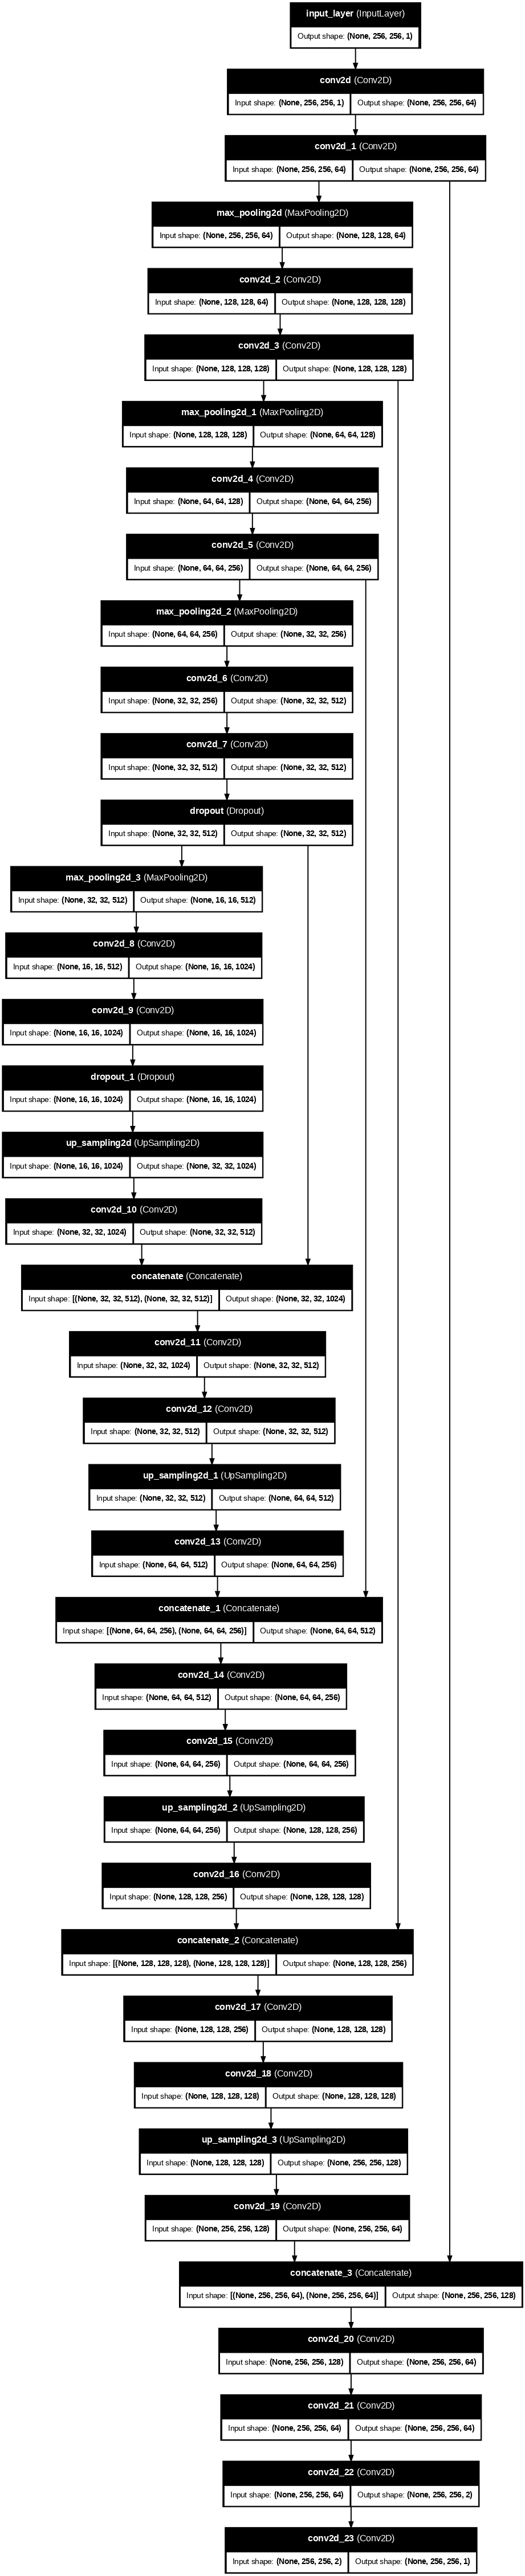

In [14]:
from tensorflow.keras.utils import plot_model
plot_model(model_u,
           show_shapes = True,
           show_dtype=False,
           show_layer_names = True,
           rankdir = 'TB',
           expand_nested = False,
           dpi = 70)

In [15]:
from tensorflow.keras import backend as K

def dice_coefficient(y_true, y_pred):
    y_pred = K.round(y_pred)
    intersection = K.sum(y_true * y_pred)
    denominator = K.sum(y_true) + K.sum(y_pred)
    return (2 * intersection) / (denominator + K.epsilon())

def iou(y_true, y_pred):
    y_pred = K.round(y_pred)
    intersection = K.sum(y_true * y_pred)
    union = K.sum(y_true + y_pred) - intersection
    return intersection / (union + K.epsilon())


model_u.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', dice_coefficient, iou]
)


In [17]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping( monitor='val_loss',  patience=2, restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=2,
    min_lr=1e-6
)

history = model_u.fit(
    x_o, x_m,
    validation_data=(x_o_val, x_m_val),
    epochs=10,
    batch_size=4,
    verbose=1,
    callbacks=[early_stopping, reduce_lr]
)


Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 201s 321ms/step - accuracy: 0.9342 - dice_coefficient: 0.0000e+00 - iou: 0.0000e+00 - loss: 1.2232 - val_accuracy: 0.9385 - val_dice_coefficient: 0.0000e+00 - val_iou: 0.0000e+00 - val_loss: 0.1327 - learning_rate: 0.0010
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 142s 284ms/step - accuracy: 0.9351 - dice_coefficient: 0.0000e+00 - iou: 0.0000e+00 - loss: 0.1425 - val_accuracy: 0.9385 - val_dice_coefficient: 0.0000e+00 - val_iou: 0.0000e+00 - val_loss: 0.1198 - learning_rate: 0.0010
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 142s 284ms/step - accuracy: 0.9338 - dice_coefficient: 0.0000e+00 - iou: 0.0000e+00 - loss: 0.1374 - val_accuracy: 0.9385 - val_dice_coefficient: 0.0000e+00 - val_iou: 0.0000e+00 - val_loss: 0.1303 - learning_rate: 0.0010
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 141s 282ms/step - accuracy: 0.9338 - dice_coefficient: 0.0000e+00 - iou: 0.0000e+00 - loss: 0.1400 - val_accuracy: 0.9385 - val_dice_coefficient: 0.0000e+00 - val_iou: 0.0000

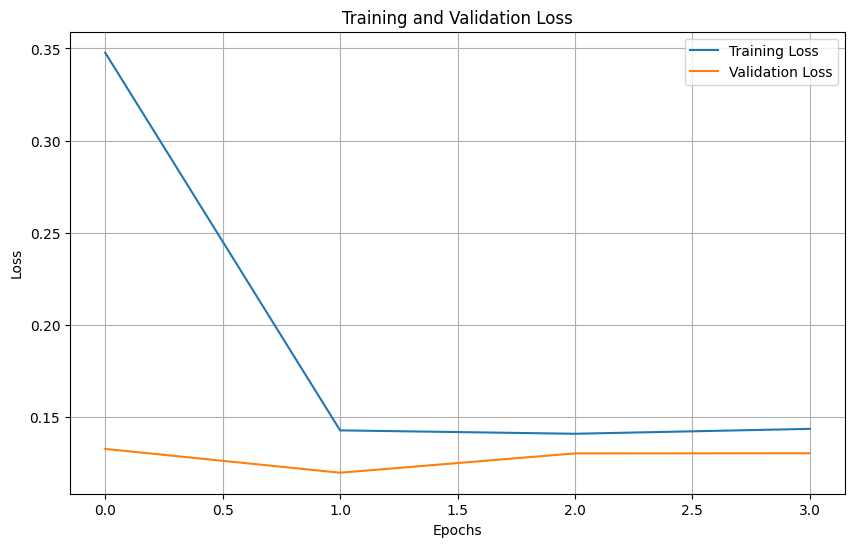

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid()
plt.show()
save_model(model_u, '/content/drive/MyDrive/data/models/unet_model.h5')
model_u.save_weights('/content/drive/MyDrive/data/models/unet_model.weights.h5')

In [ ]:

import json


directory = r'/content/drive/MyDrive/data/Br35H-Mask-RCNN/Annotation_Test/test_data'

if not os.path.exists(directory):
    os.makedirs(directory)

with open('/content/drive/MyDrive/data/Br35H-Mask-RCNN/TEST/annotations_test.json') as json_file:
    data = json.load(json_file)


# loading images
images_path = "/content/drive/MyDrive/data/Br35H-Mask-RCNN/TEST/"
val_images = glob.glob(images_path + "*.jpg")


for img in val_images:
   image = cv2.imread(img)
   dimensions = image.shape
   file_name = os.path.basename(img)
   file_name = file_name.replace(".jpg", "")
   os.chdir(directory)
   tmp = np.zeros(dimensions).astype('uint8')
   for d in data:
       if file_name == data[d]['filename'].replace(".jpg",""):
           if len(data[d]['regions'][0]['shape_attributes']) == 3:
               x_pixels = data[d]['regions'][0]['shape_attributes']['all_points_x']
               y_pixels = data[d]['regions'][0]['shape_attributes']['all_points_y']
               pts = []
               for i in range(len(x_pixels)):
                   pts.append([x_pixels[i], y_pixels[i]])
               ptss = np.array(pts)
               ptss = ptss.reshape((-1, 1, 2))
               isClosed = True
               tmp = cv2.fillPoly(tmp, [ptss], (255,255,255))
           elif len(data[d]['regions'][0]['shape_attributes']) == 6:
               center_coordinates = (data[d]['regions'][0]['shape_attributes']['cx'],
                                     data[d]['regions'][0]['shape_attributes']['cy'])
               axesLength = (int(data[d]['regions'][0]['shape_attributes']['rx']),
                             int(data[d]['regions'][0]['shape_attributes']['ry']))
               angle = data[d]['regions'][0]['shape_attributes']['theta']
               startAngle = 0
               endAngle = 360
               tmp = cv2.ellipse(tmp,center_coordinates,axesLength,angle,startAngle,endAngle,(255,255,255),thickness=-1)

   cv2.imwrite("{}.jpg".format(file_name), tmp.astype('uint8'))
   os.chdir('/content/drive/MyDrive/')


In [37]:
x_o_test = []
x_m_test= []


image_dir = "/content/drive/MyDrive/data/Br35H-Mask-RCNN/TEST/"
mask_dir = "/content/drive/MyDrive/data/Br35H-Mask-RCNN/Annotation_Test/test_data/"


image_files = glob.glob(image_dir + "*.jpg")
image_files.sort()
mask_files = glob.glob(mask_dir + "*.jpg")
mask_files.sort()


for img_file, mask_file in zip(image_files, mask_files):
  images = preprocess_image(img_file, target_size=(256, 256))
  mask = preprocess_image(mask_file, target_size=(256, 256))

  x_o_test.append(images)
  x_m_test.append(mask)

In [38]:

x_o_test = np.reshape(x_o_test, (len(x_o_test), 256, 256, 1))
x_m_test = np.reshape(x_m_test, (len(x_m_test), 256, 256, 1))


In [39]:
score = model_u.evaluate(x_o_test, x_m_test, verbose=0)
print('Test accuracy: {:.2f}'.format(score[1]))

Test accuracy: 0.93


In [40]:
predicted_masks = model_u.predict(x_o_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 618ms/step


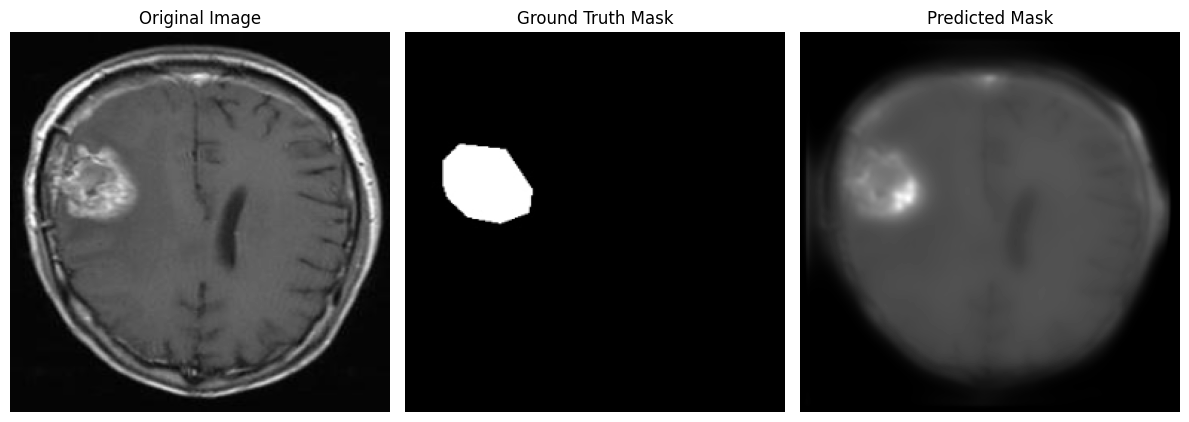

In [41]:

def visualize_segmentation(original_image, ground_truth, predicted_mask, index=0):
    """Visualize the original image, ground truth mask, and predicted mask."""
    plt.figure(figsize=(12, 6))

    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(original_image[index].squeeze(), cmap='gray')
    plt.title("Original Image")
    plt.axis("off")

    # Ground truth mask
    plt.subplot(1, 3, 2)
    plt.imshow(ground_truth[index].squeeze(), cmap='gray')
    plt.title("Ground Truth Mask")
    plt.axis("off")

    # Predicted mask
    plt.subplot(1, 3, 3)
    plt.imshow(predicted_mask[index].squeeze(), cmap='gray')
    plt.title("Predicted Mask")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

# Call the visualization function for the first test sample
visualize_segmentation(x_o_test, x_m_test, predicted_masks, index=0)

In [42]:
def predict_tumor(classification_model, image):
    image = np.reshape(image, (1, 256, 256, 1))
    prediction = classification_model.predict(image)
    return prediction[0][0] > 0.5

def segment_tumor(segmentation_model, image):
    image = np.reshape(image, (1, 256, 256, 1))
    prediction = segmentation_model.predict(image)
    return np.squeeze(prediction)

In [51]:
def process_images(image_paths,classification_model,segmentation_model):
    for image_path in image_paths:
        image_path = os.path.join('/content/drive/MyDrive/data/pred',image_path)
        print(f"Processing: {image_path}")
        original_image = cv2.imread(image_path)
        input_image = preprocess_image(image_path)

        has_tumor = predict_tumor(classification_model, input_image)

        if has_tumor:
            print("Tumor detected. Performing segmentation...")
            segmented_mask = segment_tumor(segmentation_model, input_image)
            segmented_mask = np.expand_dims(segmented_mask, axis=-1)
            segmented_mask = (segmented_mask * 255).astype(np.uint8)
            plt.figure(figsize=(12, 6))
            plt.subplot(1, 2, 1)
            plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
            plt.title("Original Image")
            plt.axis("off")

            plt.subplot(1, 2, 2)
            plt.imshow(segmented_mask, cmap='gray')
            plt.title("Segmented Tumor")
            plt.axis("off")
            plt.show()
        else:
            print("No tumor detected in the image.")

In [44]:
preds = os.listdir('/content/drive/MyDrive/data/pred')

In [49]:
from tensorflow.keras.models import load_model
cnn_weight = '/content/drive/MyDrive/data/models/cnn_model.weights.h5'
unet_weight = '/content/drive/MyDrive/data/models/unet_model.weights.h5'
cnn_model = cnn(pretrained_weights=cnn_weight)
unet_model = unet(pretrained_weights=unet_weight)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 98 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [52]:
preds = os.listdir('/content/drive/MyDrive/data/pred')

Processing: /content/drive/MyDrive/data/pred/pred53.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 816ms/step
No tumor detected in the image.
Processing: /content/drive/MyDrive/data/pred/pred20.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
No tumor detected in the image.
Processing: /content/drive/MyDrive/data/pred/pred9.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Tumor detected. Performing segmentation...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 764ms/step


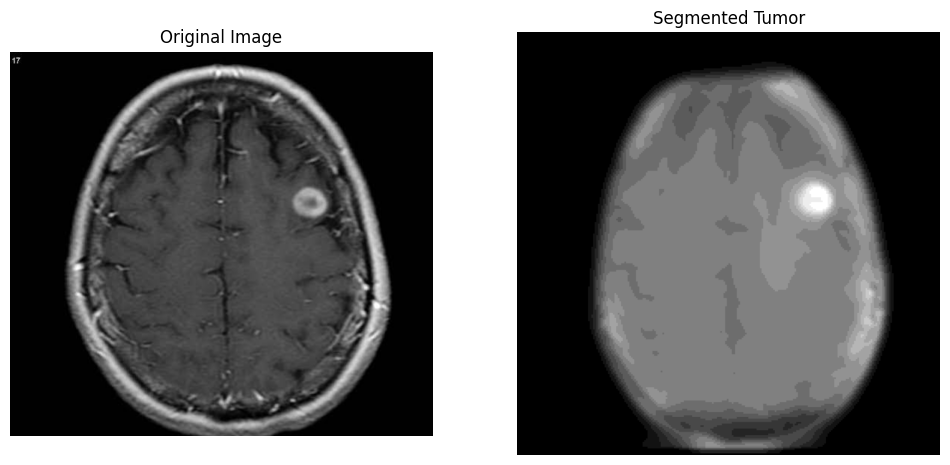

Processing: /content/drive/MyDrive/data/pred/pred44.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
No tumor detected in the image.
Processing: /content/drive/MyDrive/data/pred/pred55.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Tumor detected. Performing segmentation...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


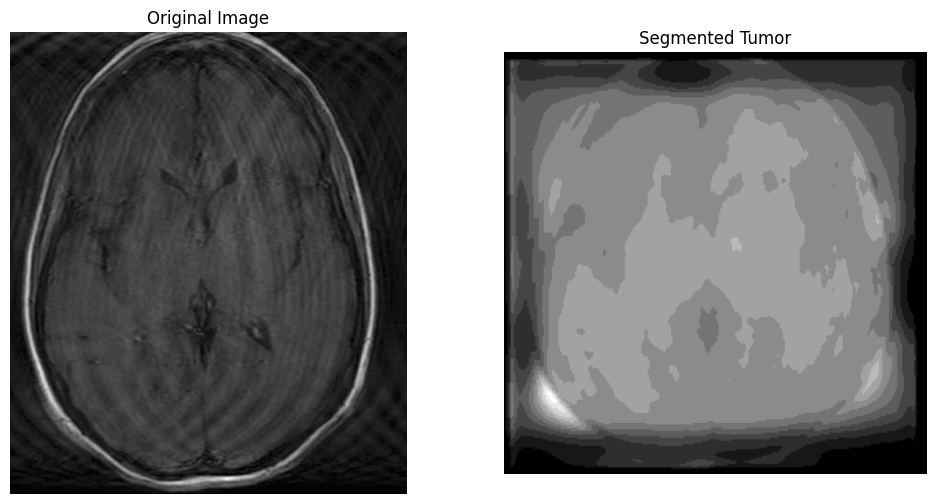

Processing: /content/drive/MyDrive/data/pred/pred42.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
No tumor detected in the image.
Processing: /content/drive/MyDrive/data/pred/pred10.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Tumor detected. Performing segmentation...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


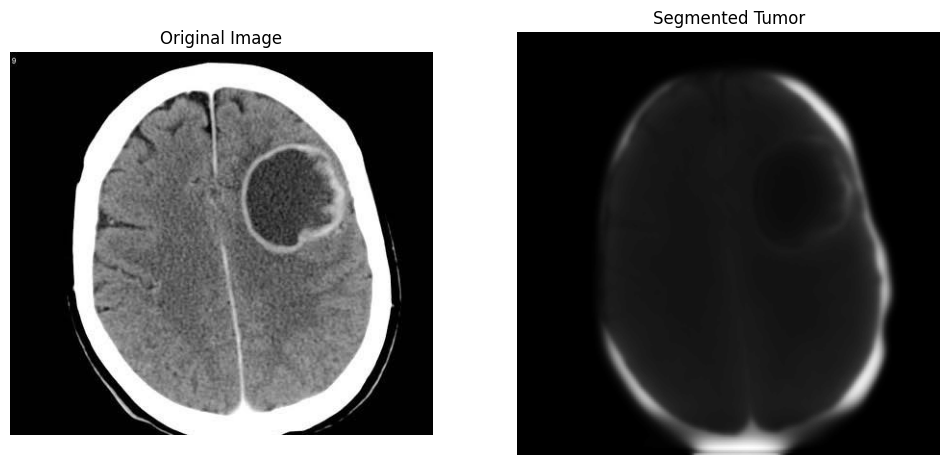

Processing: /content/drive/MyDrive/data/pred/pred4.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
No tumor detected in the image.
Processing: /content/drive/MyDrive/data/pred/pred12.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
No tumor detected in the image.
Processing: /content/drive/MyDrive/data/pred/pred11.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Tumor detected. Performing segmentation...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


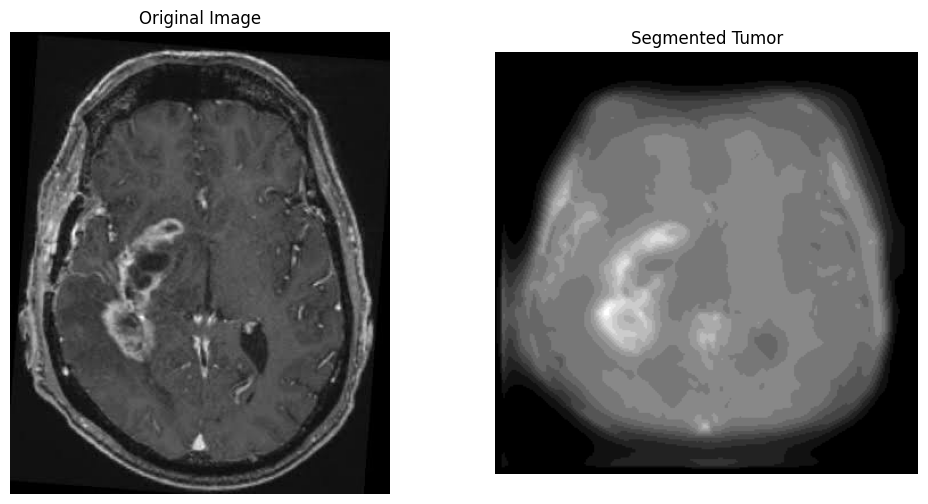

Processing: /content/drive/MyDrive/data/pred/pred43.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
No tumor detected in the image.
Processing: /content/drive/MyDrive/data/pred/pred33.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Tumor detected. Performing segmentation...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


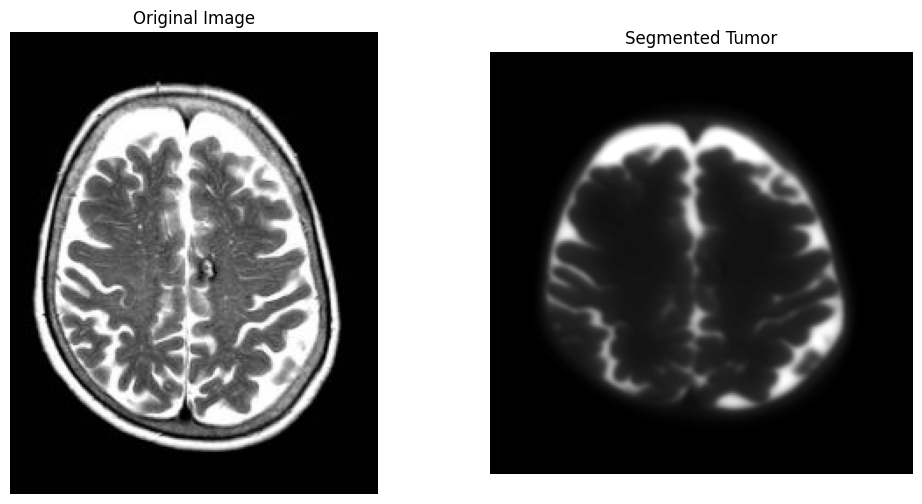

Processing: /content/drive/MyDrive/data/pred/pred23.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
No tumor detected in the image.
Processing: /content/drive/MyDrive/data/pred/pred45.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Tumor detected. Performing segmentation...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


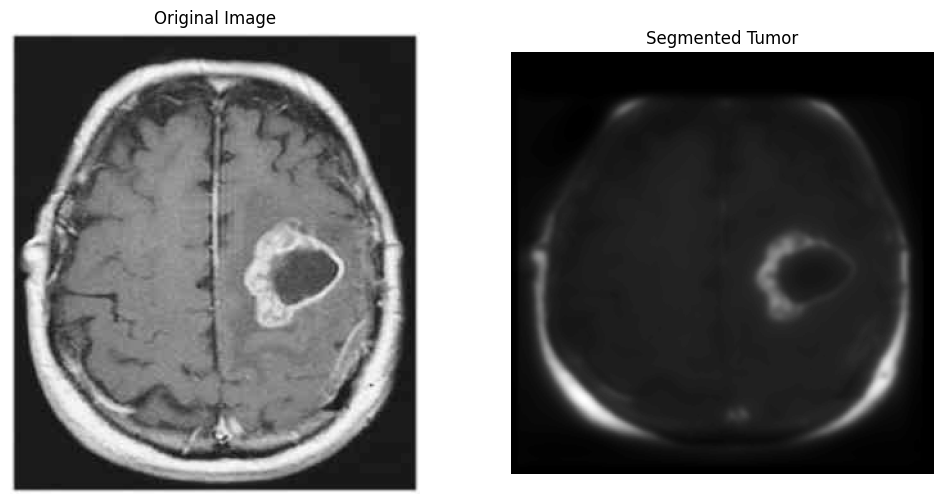

Processing: /content/drive/MyDrive/data/pred/pred5.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Tumor detected. Performing segmentation...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


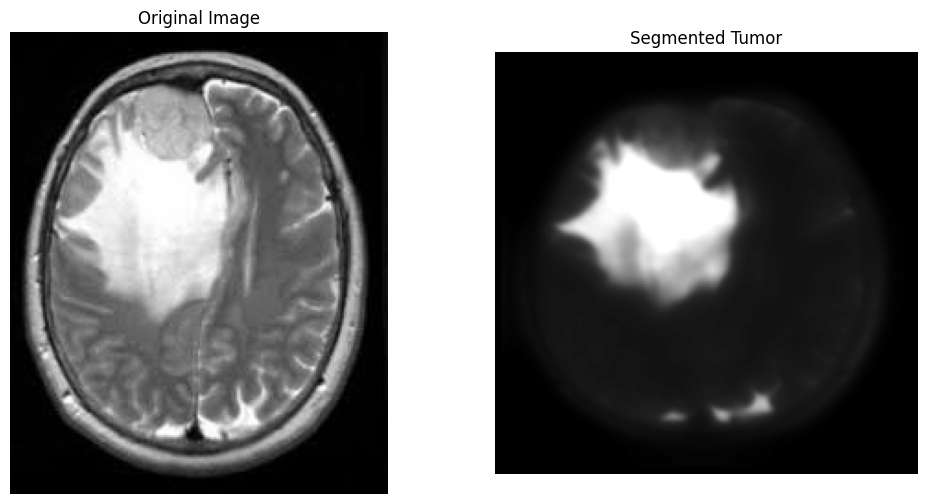

Processing: /content/drive/MyDrive/data/pred/pred19.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
No tumor detected in the image.
Processing: /content/drive/MyDrive/data/pred/pred49.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
No tumor detected in the image.
Processing: /content/drive/MyDrive/data/pred/pred41.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
No tumor detected in the image.
Processing: /content/drive/MyDrive/data/pred/pred8.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
No tumor detected in the image.
Processing: /content/drive/MyDrive/data/pred/pred16.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Tumor detected. Performing segmentation...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


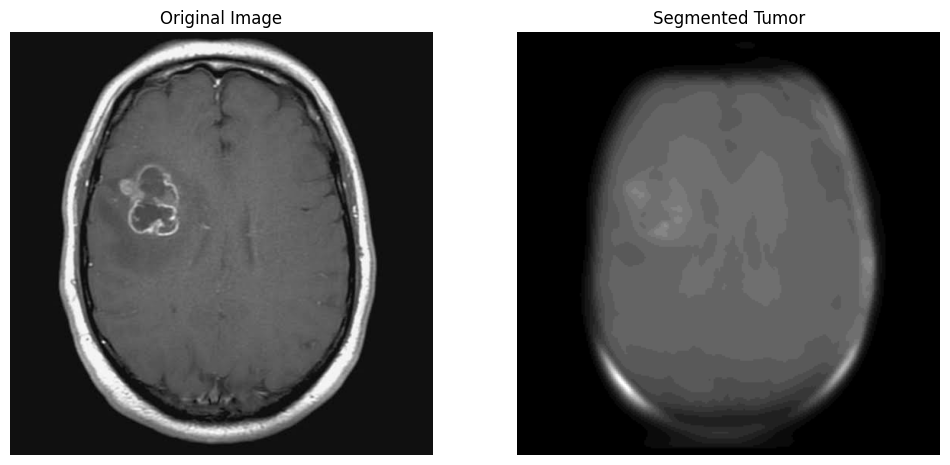

Processing: /content/drive/MyDrive/data/pred/pred27.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Tumor detected. Performing segmentation...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


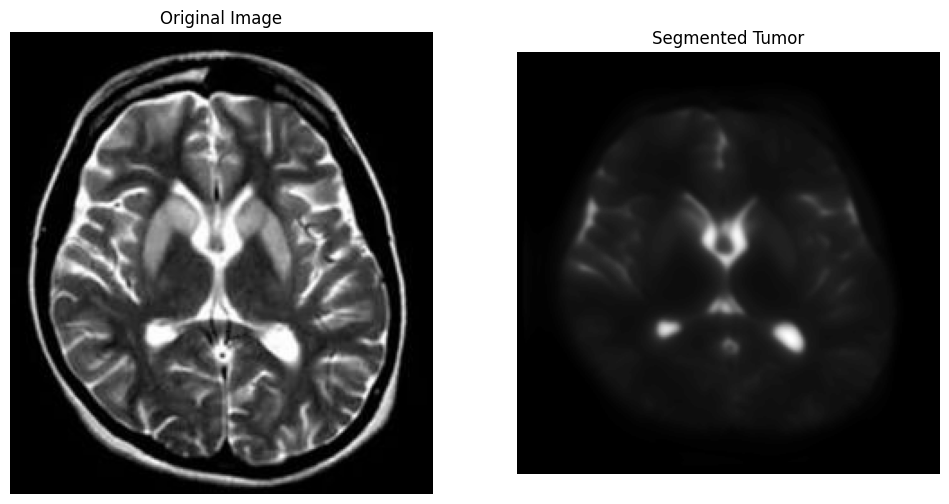

Processing: /content/drive/MyDrive/data/pred/pred39.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Tumor detected. Performing segmentation...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


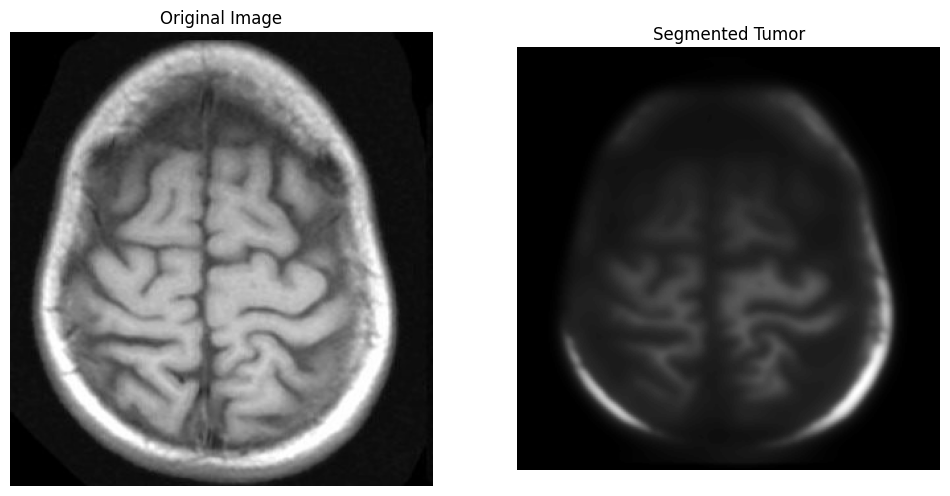

Processing: /content/drive/MyDrive/data/pred/pred25.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
No tumor detected in the image.
Processing: /content/drive/MyDrive/data/pred/pred32.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
No tumor detected in the image.
Processing: /content/drive/MyDrive/data/pred/pred36.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
No tumor detected in the image.
Processing: /content/drive/MyDrive/data/pred/pred34.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Tumor detected. Performing segmentation...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


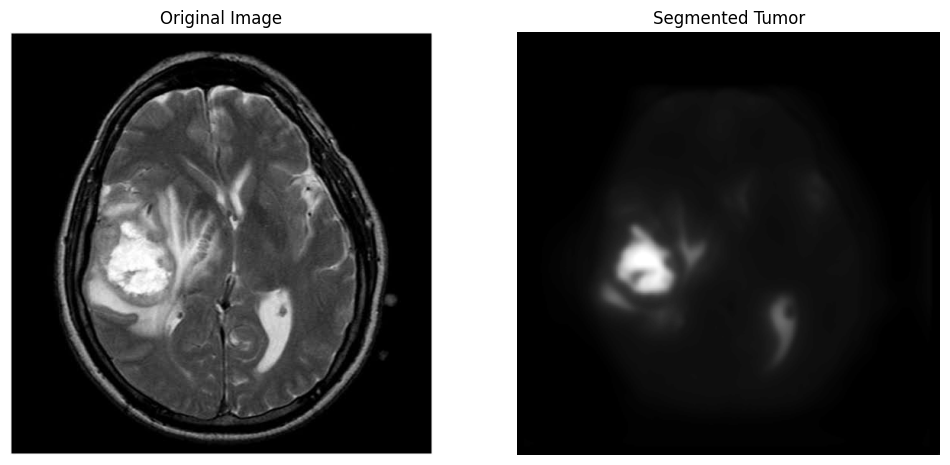

Processing: /content/drive/MyDrive/data/pred/pred14.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Tumor detected. Performing segmentation...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


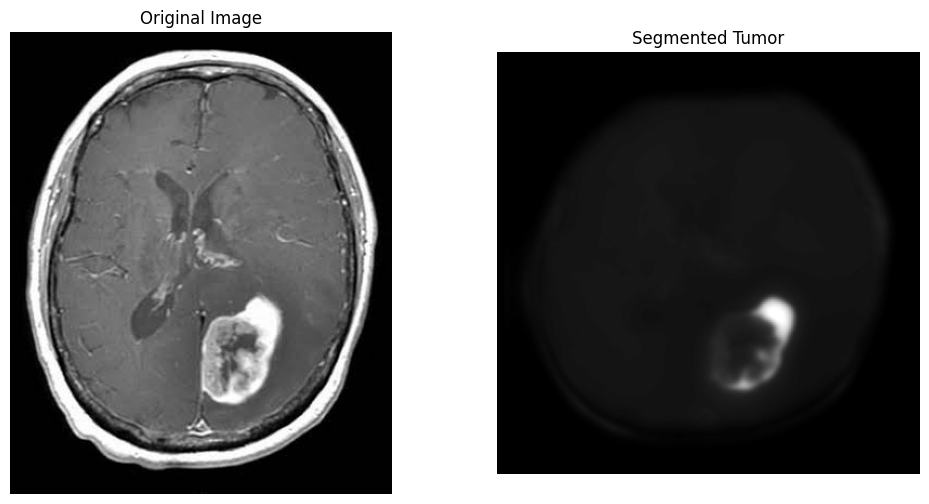

Processing: /content/drive/MyDrive/data/pred/pred52.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
No tumor detected in the image.
Processing: /content/drive/MyDrive/data/pred/pred28.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Tumor detected. Performing segmentation...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


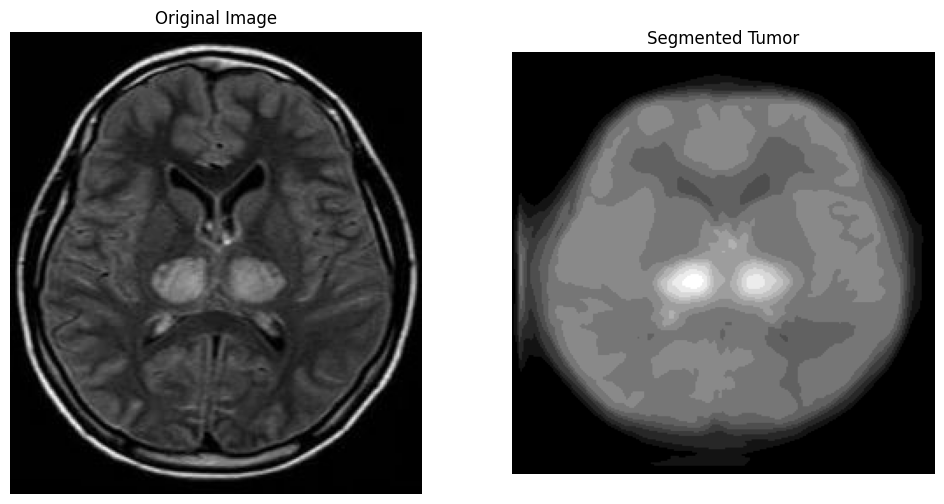

Processing: /content/drive/MyDrive/data/pred/pred22.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Tumor detected. Performing segmentation...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


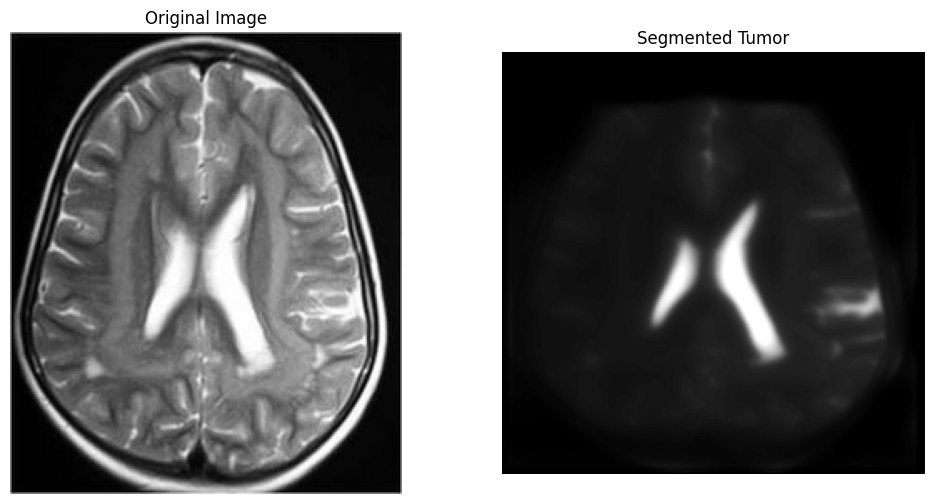

Processing: /content/drive/MyDrive/data/pred/pred29.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Tumor detected. Performing segmentation...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


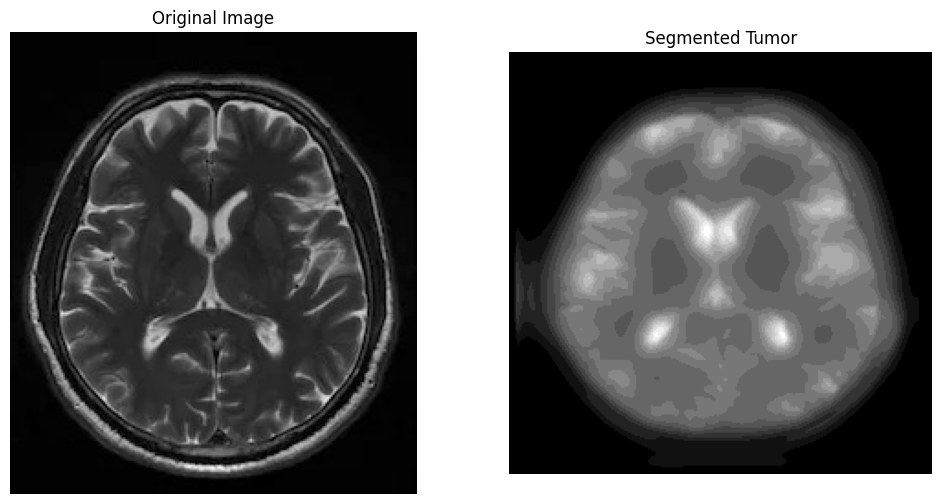

Processing: /content/drive/MyDrive/data/pred/pred18.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
No tumor detected in the image.
Processing: /content/drive/MyDrive/data/pred/pred7.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Tumor detected. Performing segmentation...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


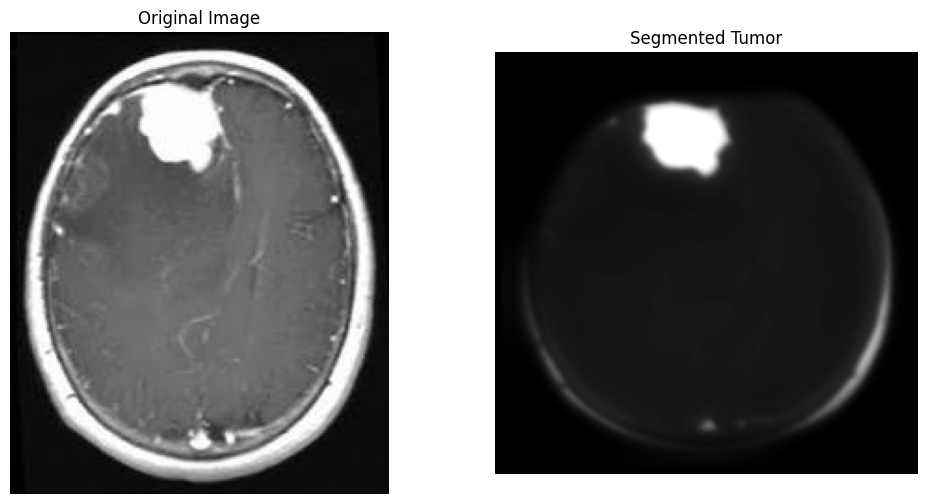

Processing: /content/drive/MyDrive/data/pred/pred57.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
No tumor detected in the image.
Processing: /content/drive/MyDrive/data/pred/pred13.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Tumor detected. Performing segmentation...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


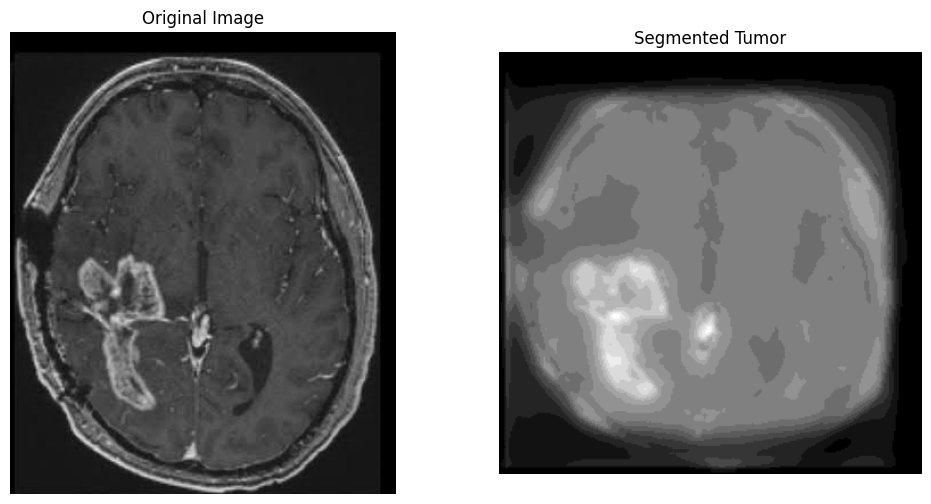

Processing: /content/drive/MyDrive/data/pred/pred17.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
No tumor detected in the image.
Processing: /content/drive/MyDrive/data/pred/pred40.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
No tumor detected in the image.
Processing: /content/drive/MyDrive/data/pred/pred38.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
No tumor detected in the image.
Processing: /content/drive/MyDrive/data/pred/pred37.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
No tumor detected in the image.
Processing: /content/drive/MyDrive/data/pred/pred35.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
No tumor detected in the image.
Processing: /content/drive/MyDrive/data/pred/pred3.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Tumor detected. Performing segmentation...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


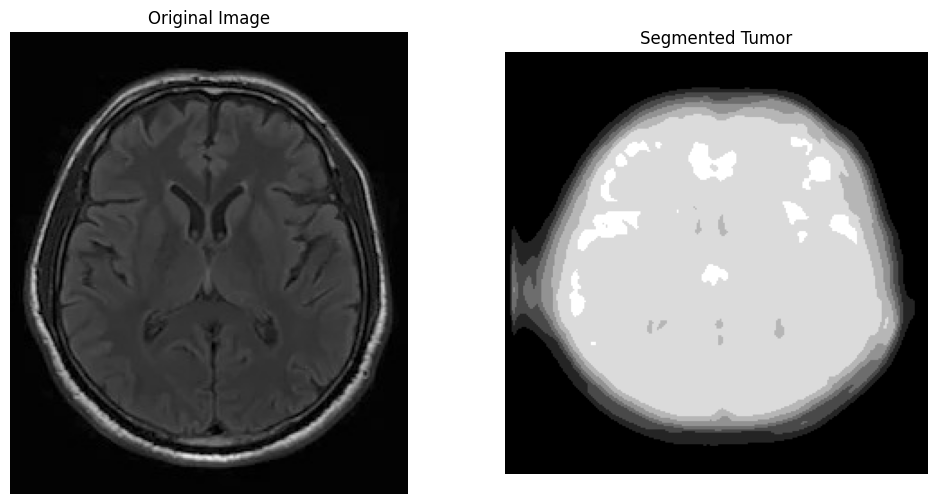

Processing: /content/drive/MyDrive/data/pred/pred54.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Tumor detected. Performing segmentation...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


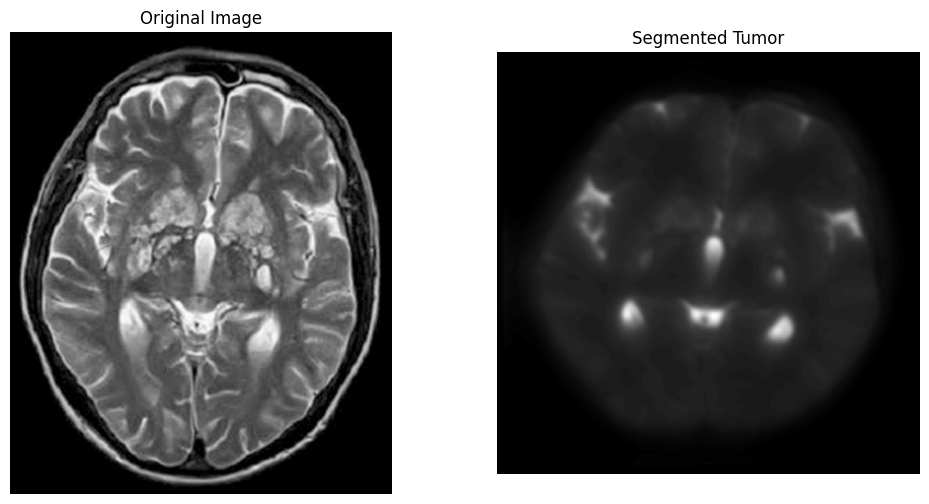

Processing: /content/drive/MyDrive/data/pred/pred56.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Tumor detected. Performing segmentation...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


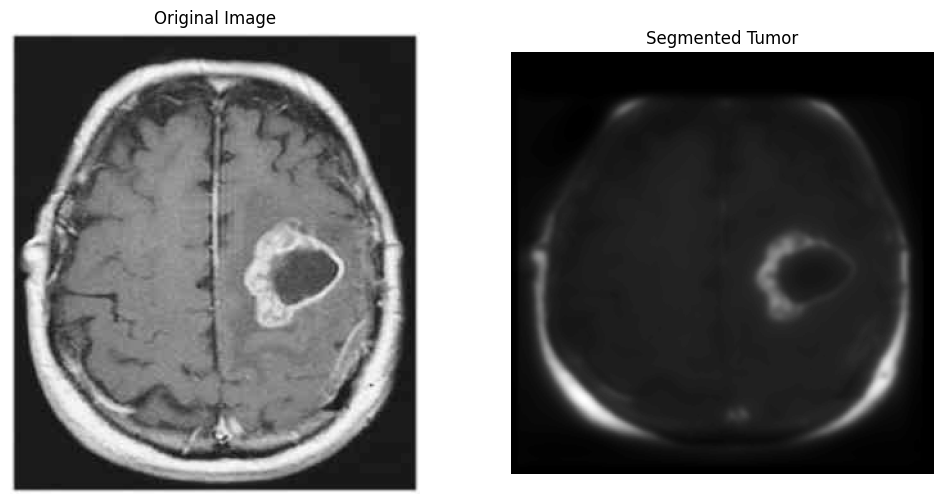

Processing: /content/drive/MyDrive/data/pred/pred58.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
No tumor detected in the image.
Processing: /content/drive/MyDrive/data/pred/pred51.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
No tumor detected in the image.
Processing: /content/drive/MyDrive/data/pred/pred6.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Tumor detected. Performing segmentation...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


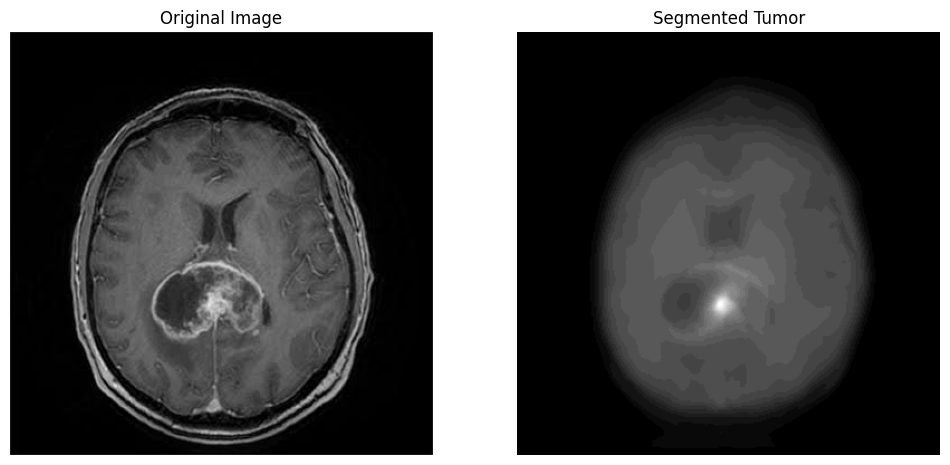

Processing: /content/drive/MyDrive/data/pred/pred1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
No tumor detected in the image.
Processing: /content/drive/MyDrive/data/pred/pred15.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Tumor detected. Performing segmentation...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


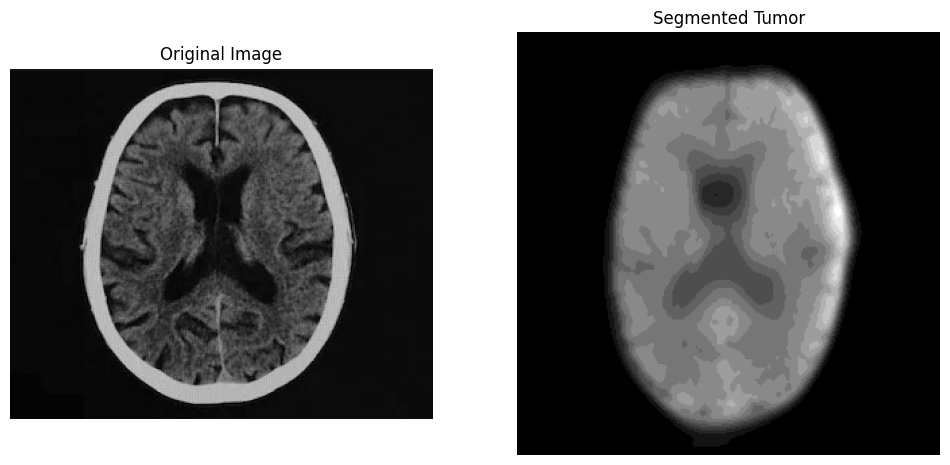

Processing: /content/drive/MyDrive/data/pred/pred30.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Tumor detected. Performing segmentation...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


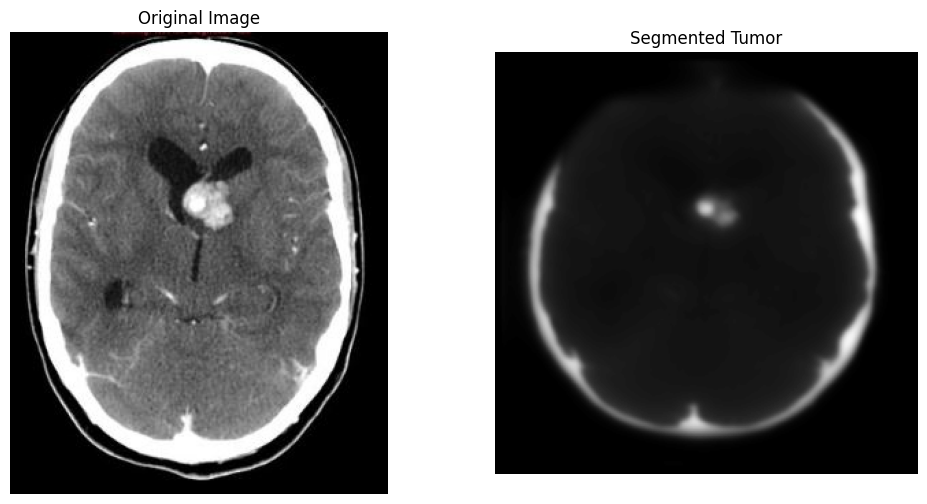

Processing: /content/drive/MyDrive/data/pred/pred47.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
No tumor detected in the image.
Processing: /content/drive/MyDrive/data/pred/pred46.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
No tumor detected in the image.
Processing: /content/drive/MyDrive/data/pred/pred50.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
No tumor detected in the image.
Processing: /content/drive/MyDrive/data/pred/pred59.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
No tumor detected in the image.
Processing: /content/drive/MyDrive/data/pred/pred26.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Tumor detected. Performing segmentation...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


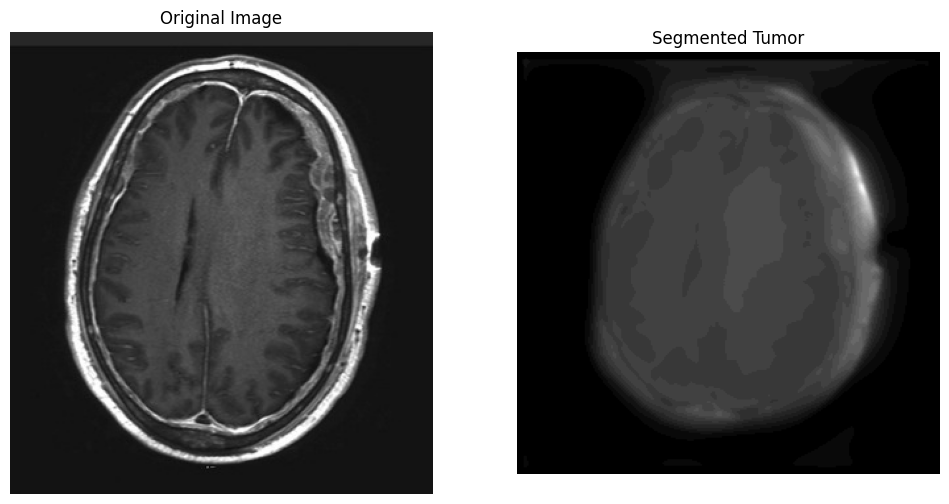

Processing: /content/drive/MyDrive/data/pred/pred31.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
No tumor detected in the image.
Processing: /content/drive/MyDrive/data/pred/pred0.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
No tumor detected in the image.
Processing: /content/drive/MyDrive/data/pred/pred24.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
No tumor detected in the image.
Processing: /content/drive/MyDrive/data/pred/pred2.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Tumor detected. Performing segmentation...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


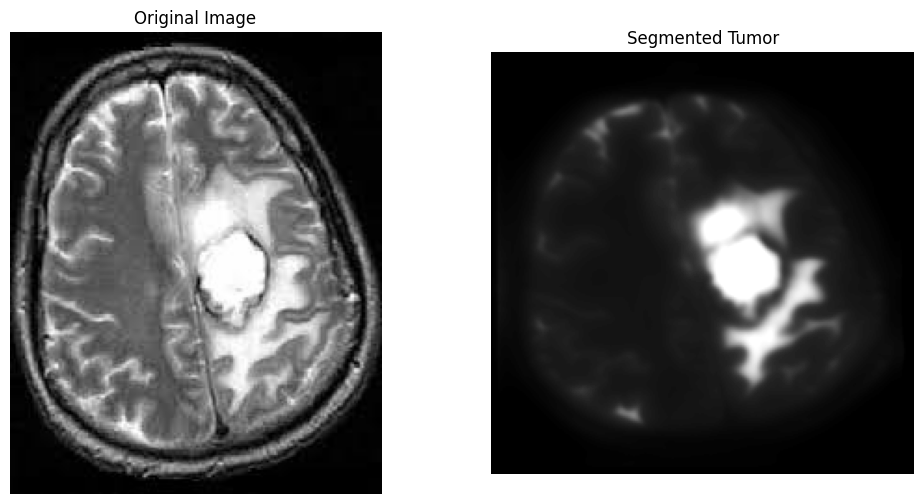

Processing: /content/drive/MyDrive/data/pred/pred21.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Tumor detected. Performing segmentation...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


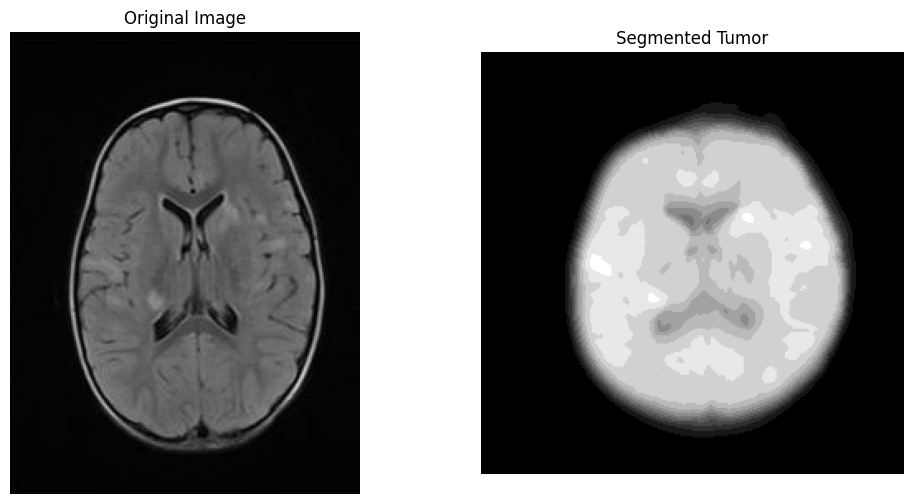

Processing: /content/drive/MyDrive/data/pred/pred48.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
No tumor detected in the image.


In [54]:
process_images(preds,cnn_model,unet_model)


In [56]:
def process_image(image_path,classification_model,segmentation_model):
        print(f"Processing: {image_path}")
        original_image = cv2.imread(image_path)
        input_image = preprocess_image(image_path)

        has_tumor = predict_tumor(classification_model, input_image)

        if has_tumor:
            print("Tumor detected. Performing segmentation...")
            segmented_mask = segment_tumor(segmentation_model, input_image)
            segmented_mask = np.expand_dims(segmented_mask, axis=-1)
            segmented_mask = (segmented_mask * 255).astype(np.uint8)
            plt.figure(figsize=(12, 6))
            plt.subplot(1, 2, 1)
            plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
            plt.title("Original Image")
            plt.axis("off")

            plt.subplot(1, 2, 2)
            plt.imshow(segmented_mask, cmap='gray')
            plt.title("Segmented Tumor")
            plt.axis("off")
            plt.show()
        else:
            print("No tumor detected in the image.")

Processing: /content/imag1.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Tumor detected. Performing segmentation...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


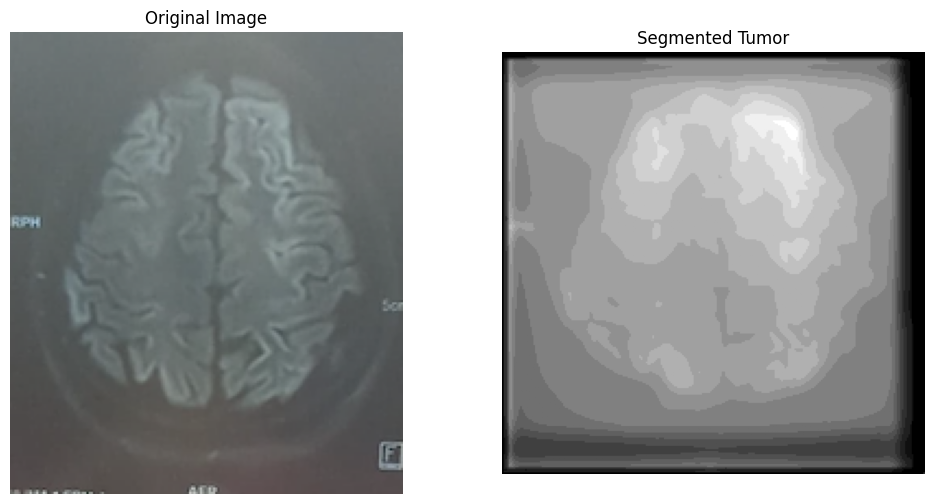

In [57]:
process_image('/content/imag1.png',cnn_model,unet_model)

Processing: /content/imag2.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Tumor detected. Performing segmentation...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


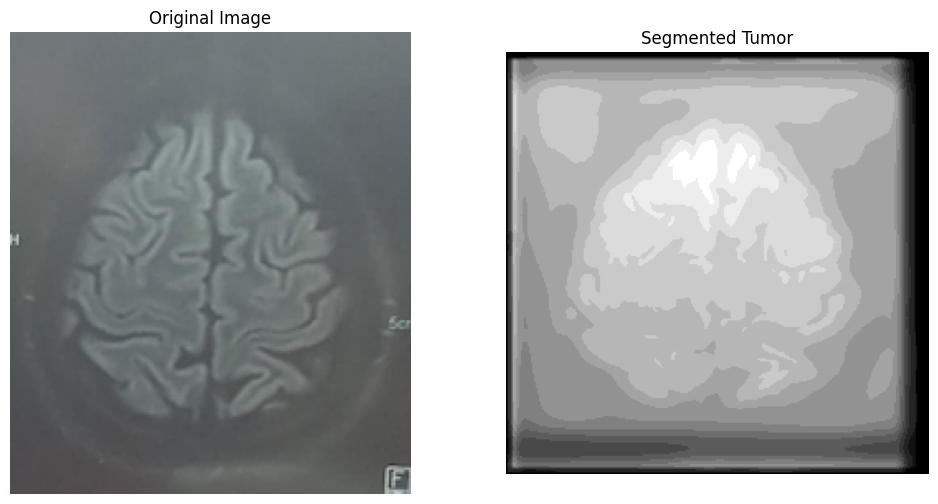

In [58]:
process_image('/content/imag2.png',cnn_model,unet_model)

Processing: /content/imag3.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Tumor detected. Performing segmentation...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


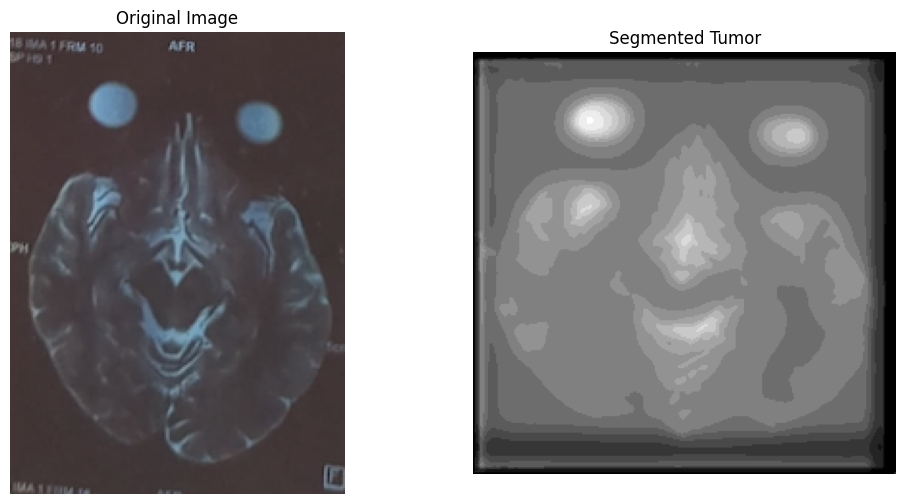

In [59]:
process_image('/content/imag3.png',cnn_model,unet_model)

Processing: /content/image4.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Tumor detected. Performing segmentation...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


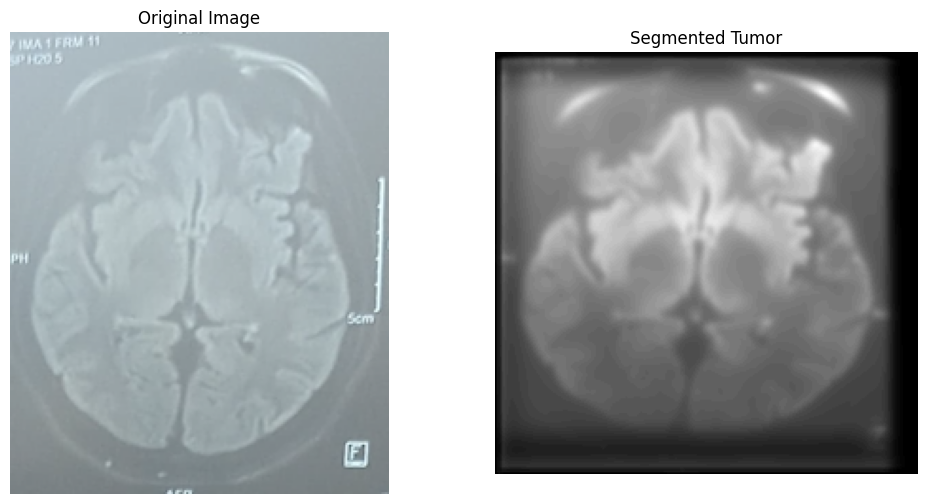

In [60]:
process_image('/content/image4.png',cnn_model,unet_model)